In [8]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch.nn as nn
import cv2
from keras import Model
from PIL import Image
from keras.models import load_model
from tensorflow.keras import layers,models
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout
from sklearn.model_selection import train_test_split
import glob





In [13]:
DIR = './images/'
WIDTH = 256
HEIGHT = 256
IMWIDTH = 1280
IMHEIGHT = 720

def show(img):
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()
    

In [28]:
df = pd.read_csv('./train_labels.csv')
numdf = df.to_numpy()

NUM = 456
fname = df['image_name'][NUM]
original_label = df['points'][NUM]

In [29]:
model1 = load_model('./UNET_Model_2.h5')
model2 = load_model('./LabelFinder.h5') 

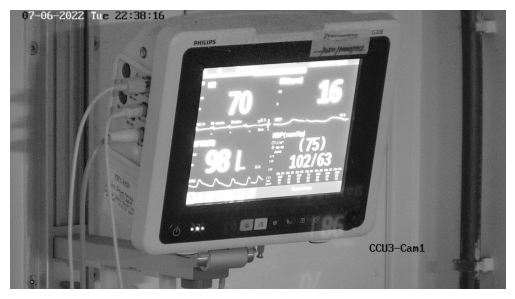

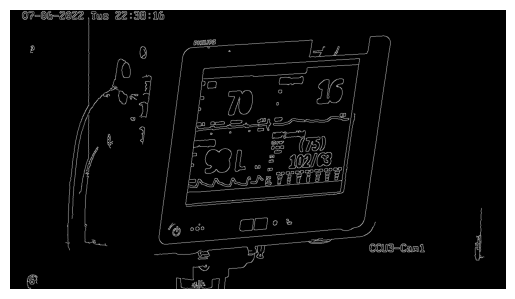

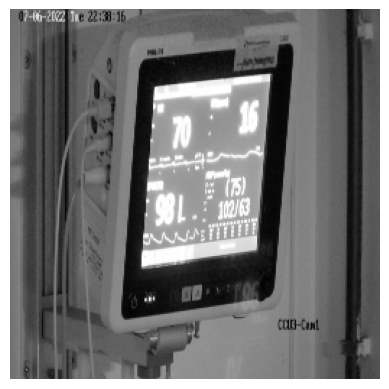

1/1 [==============================] - 0s 197ms/step


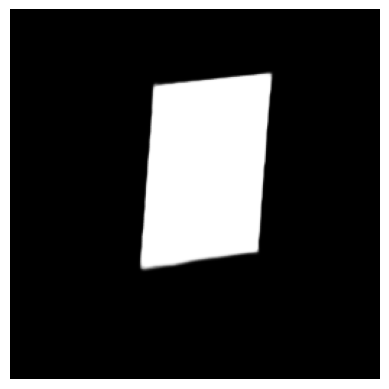

1/1 [==============================] - 0s 57ms/step
[305, 243, 598, 252, 608, 478, 314, 464
[500.20001220703125, 151.5, 901.5, 126.2, 853.7000122070312, 470.1000061035156, 453.5, 503.70001220703125]


In [30]:
img = cv2.imread(DIR + fname, cv2.IMREAD_GRAYSCALE)
show(img)
img = cv2.GaussianBlur(img,(5,5), cv2.BORDER_CONSTANT)
canny = cv2.Canny(img,10,200)
show(canny)
img = cv2.resize(img,(256,256))
img=img.astype(np.float32)
show(img)
img /= 255
img = np.expand_dims(img, axis=0)
mask = model1.predict(img)[0]
show(mask)
mask = np.expand_dims(mask,axis=0)
pred = model2.predict(mask)
labels = pred[0]
labels = [int(num) for num in labels]
print(f'[305, 243, 598, 252, 608, 478, 314, 464')
print(original_label)


In [18]:
X = np.array(X)
Y = np.array(Y)

NameError: name 'X' is not defined

In [64]:
X_new = []
Y_new = []


def dataloader2(img,label):
    img = np.expand_dims(img, axis=0)
    label = label[1:-1]
    label = label.split(',')
    processed = [int(float(num)) for num in label]
    Y_new.append(processed)
    
    

In [65]:
for pair in numdf:
    dataloader2(pair[0], pair[1])
    
Y_new = np.array(Y_new)

In [66]:
cnn = models.Sequential([
    layers.Conv2D(filters=16,activation='relu',kernel_size=(3,3), input_shape=(HEIGHT,WIDTH,1),padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=16,activation='relu',kernel_size=(3,3),padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=8,activation='relu',kernel_size=(3,3),padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(8,activation='relu')
])

In [67]:
X_new_train,X_new_val,Y_new_train,Y_new_val = train_test_split(X,Y_new, test_size=0.05,random_state=34)

In [69]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
cnn.compile(optimizer='adam', metrics='accuracy', loss=MeanSquaredError())

early_stopping = EarlyStopping(patience=10, verbose=1)
model_checkpoint = ModelCheckpoint("./LabelFinder.h5", save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
epochs = 300
batch_size = 32

In [70]:
cnn.fit(X_new_train,Y_new_train, validation_data=[X_new_val,Y_new_val], batch_size=batch_size, epochs=epochs, callbacks=[early_stopping,model_checkpoint,reduce_lr])

Epoch 1/300
54/54 [==============================] - ETA: 0s - loss: 155715.2969 - accuracy: 0.4298
Epoch 1: val_loss improved from inf to 107114.00000, saving model to .\LabelFinder.h5
54/54 [==============================] - 22s 392ms/step - loss: 155715.2969 - accuracy: 0.4298 - val_loss: 107114.0000 - val_accuracy: 0.4889 - lr: 0.0010
Epoch 2/300
54/54 [==============================] - ETA: 0s - loss: 106209.7656 - accuracy: 0.4673
Epoch 2: val_loss improved from 107114.00000 to 104659.17969, saving model to .\LabelFinder.h5
54/54 [==============================] - 21s 397ms/step - loss: 106209.7656 - accuracy: 0.4673 - val_loss: 104659.1797 - val_accuracy: 0.4889 - lr: 0.0010
Epoch 3/300
54/54 [==============================] - ETA: 0s - loss: 104169.0078 - accuracy: 0.4673
Epoch 3: val_loss improved from 104659.17969 to 103190.46875, saving model to .\LabelFinder.h5
54/54 [==============================] - 21s 393ms/step - loss: 104169.0078 - accuracy: 0.4673 - val_loss: 103190.

KeyboardInterrupt: 